In [1]:
from lsmulator import *
from workloads import *
from optimizer import *
import numpy as np
import matplotlib.pyplot as plt
from figure_grid import *

# LSMulator Demo

The goal of this notebook is to show how simulations of our LSM tree perform under different workload conditions.

In [2]:
zipfs = [ZipfWorkload(zipf_param=1.1),
         ZipfWorkload(zipf_param=1.25),
         ZipfWorkload(zipf_param=1.5)]

In [3]:
timedecs = [TimeDecayBetaMultWorkload(),
            TimeDecayBetaMultWorkload(discoveries=scipy.stats.poisson(5)),
            TimeDecayBetaMultWorkload(decay_rate=scipy.stats.beta(10, 1)),
            TimeDecayBetaMultWorkload(decay_rate=scipy.stats.beta(1, 1))]

In [4]:
robins = [RoundRobinWorkload()]

In [5]:
trace, costs = optimize(
  {'cache_size': 25, 'layer_size': 100, 'layer_ratio': 5, 'bloom_bit_length': 10, 'bloom_hash_count': 5},
  zipfs[0].queries,
  100
)

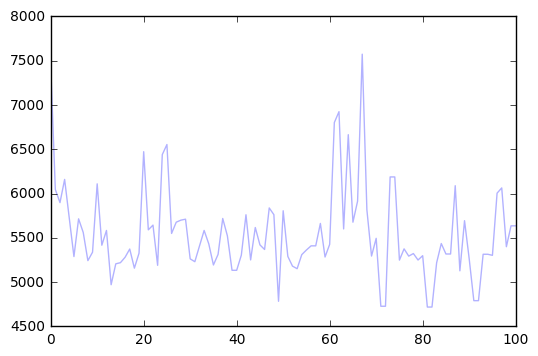

In [6]:
plt.plot(costs, alpha=0.3)
plt.show()

In [10]:
trace[np.argmin(costs)]

{'bloom_bit_length': 10,
 'bloom_hash_count': 5,
 'cache_size': 88,
 'layer_ratio': 5,
 'layer_size': 37}

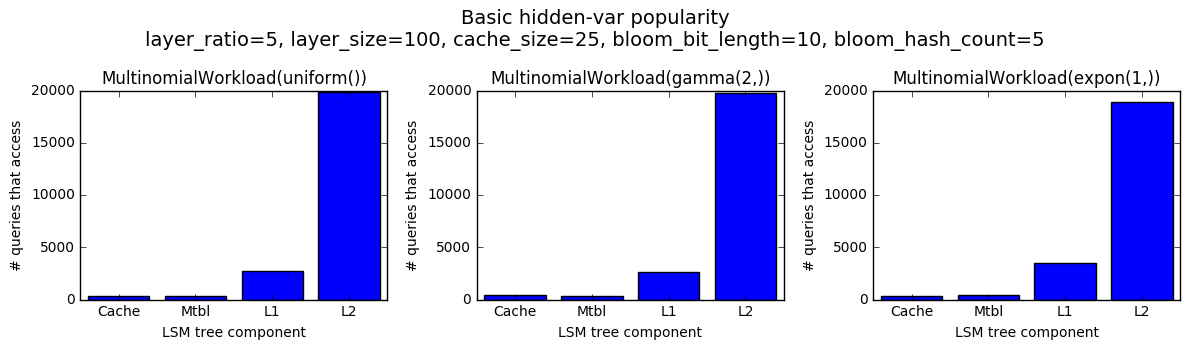

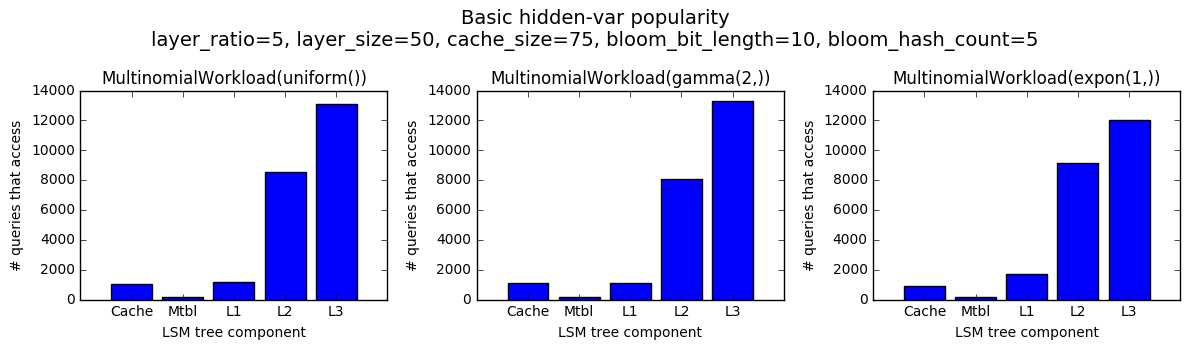

In [11]:
plot_workload_trees(mults, 'Basic hidden-var popularity',
    **{'cache_size': 25, 'layer_size': 100, 'layer_ratio': 5, 'bloom_bit_length': 10, 'bloom_hash_count': 5})

plot_workload_trees(mults, 'Basic hidden-var popularity',
    **{'cache_size': 75, 'layer_size': 50, 'layer_ratio': 5, 'bloom_bit_length': 10, 'bloom_hash_count': 5})

We see above that increasing the cache size helped us a little bit, but not significantly.

On the Zipf workloads, however, having a big cache helps us a lot, and for the Zipf(1.1) workload (which is the least skewed), increasing the cache size helps us out significantly:

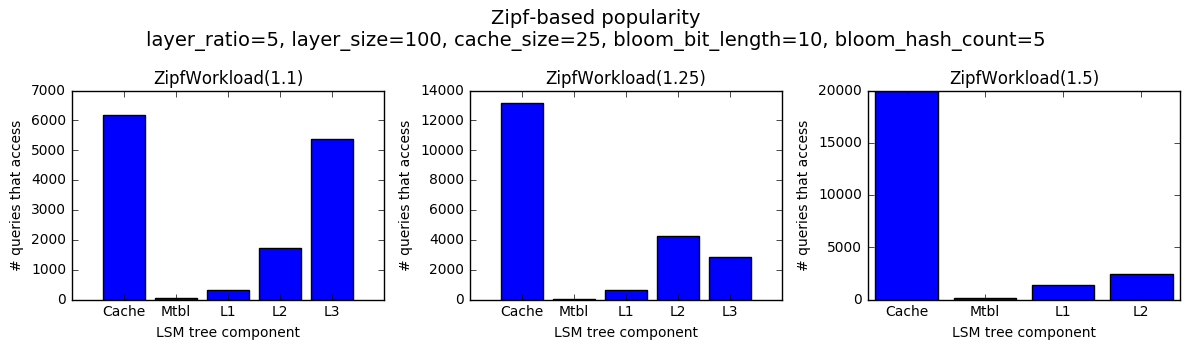

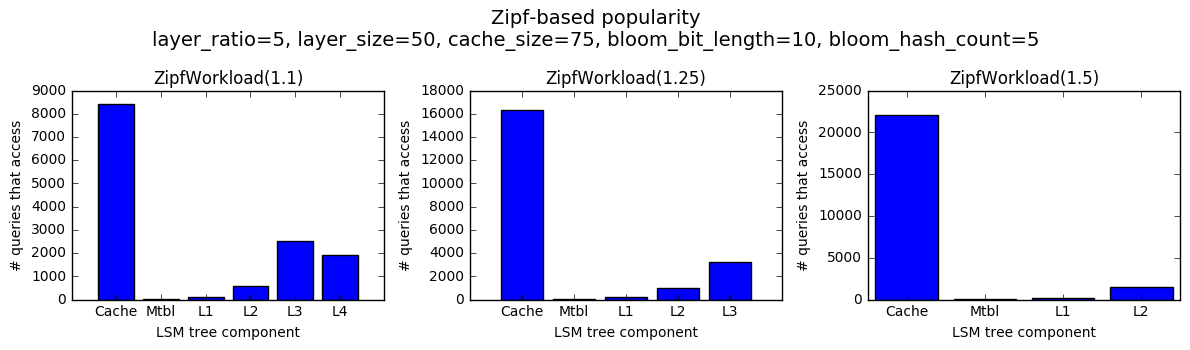

In [12]:
plot_workload_trees(zipfs, 'Zipf-based popularity',
    **{'cache_size': 25, 'layer_size': 100, 'layer_ratio': 5, 'bloom_bit_length': 10, 'bloom_hash_count': 5})

plot_workload_trees(zipfs, 'Zipf-based popularity',
    **{'cache_size': 75, 'layer_size': 50, 'layer_ratio': 5, 'bloom_bit_length': 10, 'bloom_hash_count': 5})

Now let's start considering some models with temporal dependencies (below):

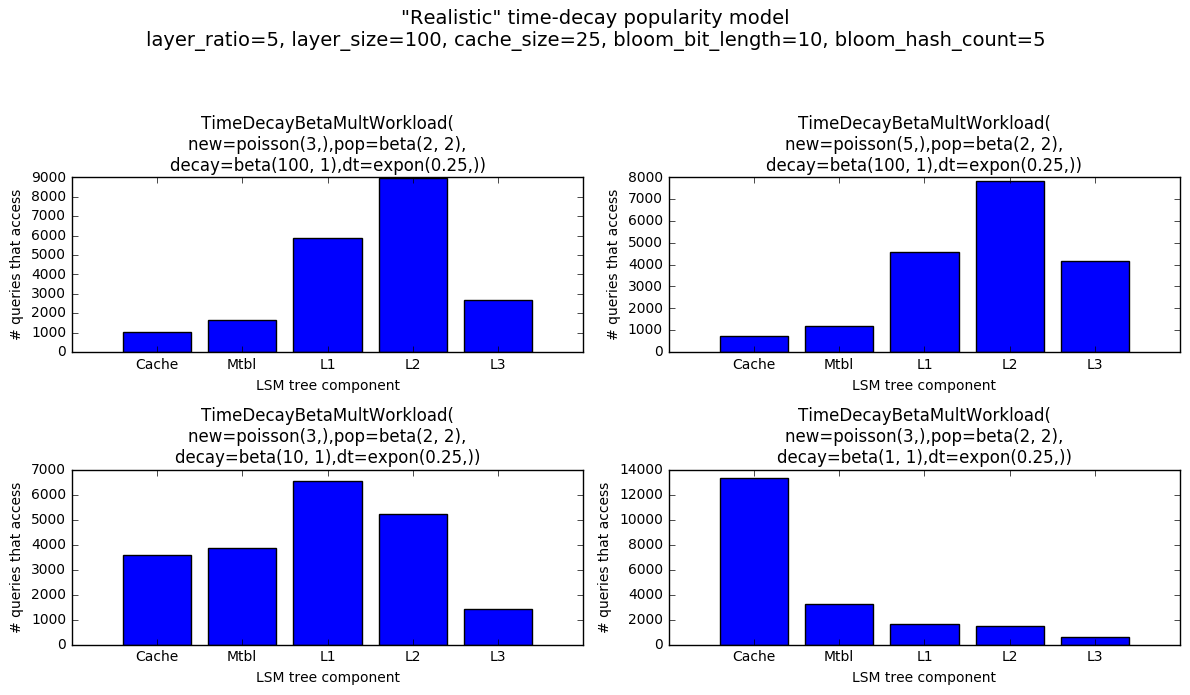

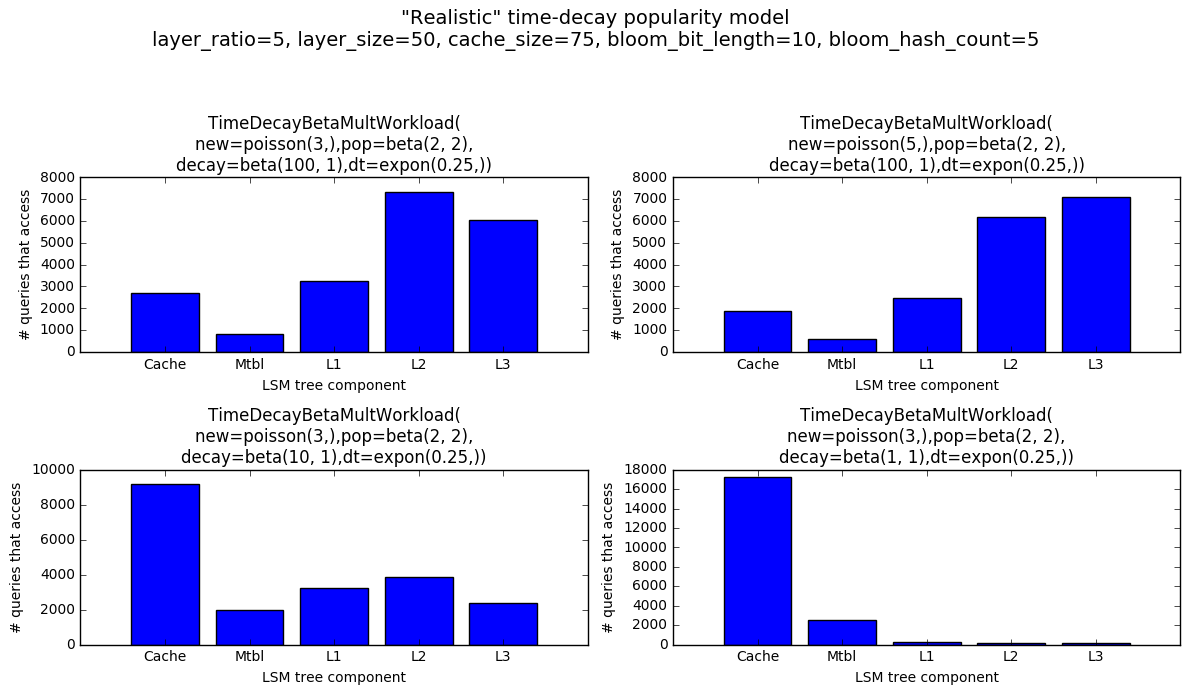

In [13]:
plot_workload_trees(timedecs, '"Realistic" time-decay popularity model', (2,2),
    **{'cache_size': 25, 'layer_size': 100, 'layer_ratio': 5, 'bloom_bit_length': 10, 'bloom_hash_count': 5})

plot_workload_trees(timedecs, '"Realistic" time-decay popularity model', (2,2),
    **{'cache_size': 75, 'layer_size': 50, 'layer_ratio': 5, 'bloom_bit_length': 10, 'bloom_hash_count': 5})

First, note that our lowest level, even though it contains the most data, often gets queried less often (because data stored there is less likely to be accessed, since it's old). Also, caching is very helpful when recent items are more common, and the memtable actually may be kind of supplanted by the cache (though it's difficult to distinguish the memtable's lack of popularity from its small size without delving into the data further, which we could, but not now).

Finally, let's just confirm the awfulness of round-robin queries:

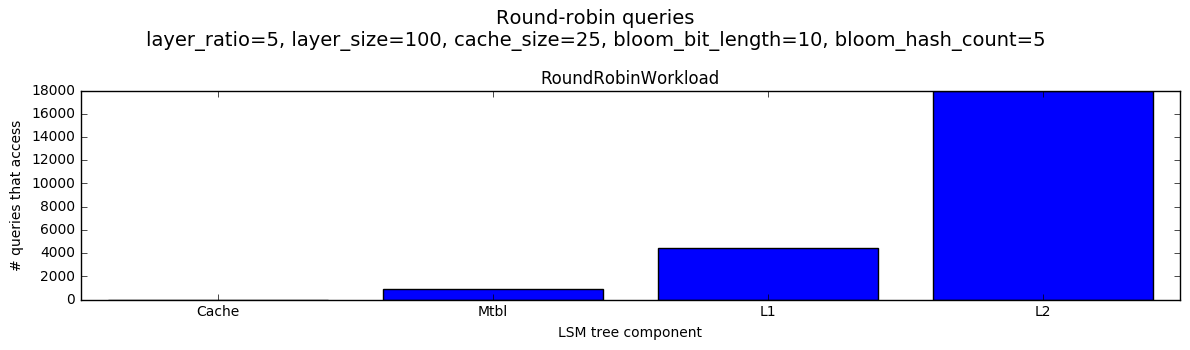

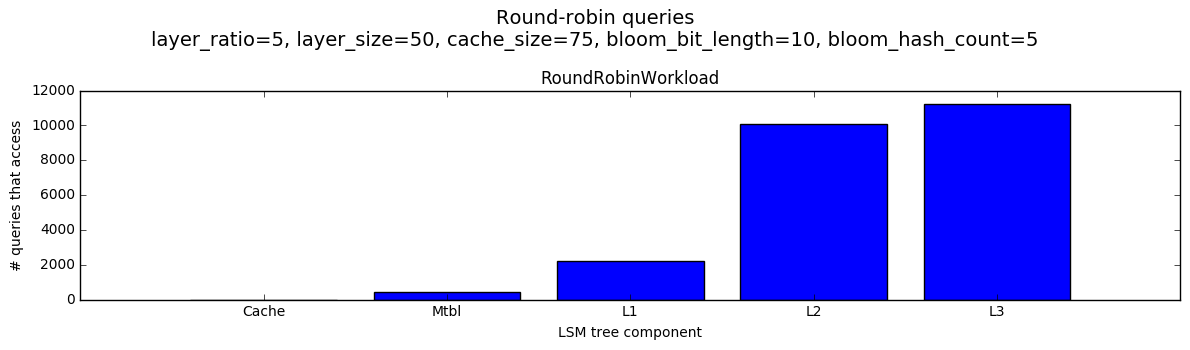

In [18]:
plot_workload_trees(robins, 'Round-robin queries',
    **{'cache_size': 25, 'layer_size': 100, 'layer_ratio': 5, 'bloom_bit_length': 10, 'bloom_hash_count': 5})

plot_workload_trees(robins, 'Round-robin queries',
    **{'cache_size': 75, 'layer_size': 50, 'layer_ratio': 5, 'bloom_bit_length': 10, 'bloom_hash_count': 5})

The cache is utterly useless, and most of our queries have to go to the lowest levels of our tree.

Hopefully this illustrates how differently LSM trees can behave based on the underlying query distribution, and why optimizing for it is a promising approach!